# Compression with Constraints: Steganography

The natural images are compressible, usually a full size image of several megabytes can be reduced to kilobytes level easily without lossing too much important information. Such property has been used widely to denoising, deblur, etc. techniques. 

The [``steganography``](https://en.wikipedia.org/wiki/Steganography) is a topic lying in the cryptography. It is concealing a file, message, image, or video within another file, message, image, or video. 

The advantage of steganography over cryptography alone is that the intended secret message ***does not attract attention to itself as an object of scrutiny***. Plainly visible encrypted messages, no matter how unbreakable they are, arouse interest and may in themselves be incriminating in countries in which encryption is illegal. 

Whereas cryptography is the practice of protecting the contents of a message alone, steganography is concerned both with concealing the fact that a secret message is being sent and its contents.

Steganography includes the concealment of information within computer files. In digital steganography, electronic communications may include steganographic coding inside of a transport layer, such as a document file, image file, program or protocol. Media files are ideal for steganographic transmission because of their large size. For example, a sender might start with an innocuous image file and adjust the color of every hundredth pixel to correspond to a letter in the alphabet. The change is so subtle that someone who is not specifically looking for it is unlikely to notice the change. 

In this project, we deal with a special case: stegranography with images only. So unlike many practical scenes, for instance, encrypt text, document in images, this task might not be able to produce perfect recovery of information.

## Purpose of the project

The project is not meant to create super powerful technique to conceal information, it is more concerned to get used to imaging processing libraries and optimization techniques. On the other hand, it also provides a challenge to think about how to detect the ``steganographic`` images without the original images.

## Mathematical aspects

The stegranography has two important components: encryption and decryption. 

Suppose you have an original image and a secret image.


1.   Encryption: As a sender, your task is to make the original image and secret image merge into one image. The purpose is two fold. Firstly, your outcome must be an image, if this image stays far away from the original image, then it will attract other people's attention. That will count as a failure. Secondly, your outcome image must also convey the information of the secret image. It is not that simple, since any blending of information will change each other. The problem is how much we can afford.
2.   Decryption: After the encryption part, your outcome image will have two parts of information coming from original image and the secret image. As the receiver, your task will be inverting the encryption process, to recover the secret image as much as possible (Caution,  the receiver do not care about original image). 

If we mathematically represent such process, let $x$ be the original image, $y$ is the secret image, then $z = E(x, y)$ is the encrypted image, $E$ is the encryption function. You will try to minimize 
$$\|z - x\|$$
The above norm is in certain sense, we will discuss that later. However, above minimization will subject to another constraint, which is the decryption function $D$ can recover sufficient information of the secret image. That is 
$$\|D(z) - y\|$$
should be as small as possible.

It is possible to construct a unified objective function:
$$\min_{E, D} \|x - E(x,y)\| + \gamma \|y - D(z)\|$$
where $E$ and $D$ are the parameters to find. $\gamma$ is a parameter chosen at your choice.

Of course, there are other constraints from the images, because images are pixels, each pixel contains 3 channels: R,G,B, each one is a 8-bit integer, goes from 0 to 255. If the image has 4 channels RGBA, then it will provide more information. Therefore above optimization problem also has constraints that $E(x,y)$ and $D(z)$ must be images. 



## Algorithm 101, LSB

The LSB is called least significant bits, which means you will replace the least significant bits of the original image with the secret image's most significant bits. This method will kill some information from both images, but the performance seems OK for general cases.

Here are a few references on this simple algorithm: 

0.   https://towardsdatascience.com/steganography-hiding-an-image-inside-another-77ca66b2acb1, the code is [here](https://github.com/kelvins/steganography)
1.   https://github.com/RobinDavid/LSB-Steganography 
2.   https://pdfs.semanticscholar.org/3dce/b6307cee042b687b7f377ec1d5de91ce20b0.pdf
3.   https://hackernoon.com/simple-image-steganography-in-python-18c7b534854f

The basic idea is (suppose you have a code to turn int8 into binary string),  inside each channel, say R, your original image's pixel, say represented as ``1001,0011``, and your secret image's that pixel is ``1110,1101``, then replace the last 4 bits in original image's pixel with the first 4 bits of secret image's corresponding pixel, the resulting number will be ``1001,1110``. In this way, the change in the original image could be small (on average).  There are other ways to alter the LSB, like treating the secret image as a binary string , and evenly distribute to each pixel. ***In our case, for simplicity, we only consider the images with the same size.***

## Shortcomings 

The shortcomings of algorithms/methods are mainly on the detection, which is, we can easily detect your outcome image is not feeling right. 

In practice, if you look at the altered image, say from LSB, you do not feel anything. But the LSB has a very obvious drawback: it alters the last bit, which may distory the statistics of the last bit. In theory, the last bit 0 and 1 should obey certain heuristic distribution in the image, but now it will be changed.

The detection code is here: https://github.com/b3dk7/StegExpose

In https://dl.acm.org/citation.cfm?id=1929317, the paper introduced the method to preserve the statistics. 

In https://pdfs.semanticscholar.org/80a5/fcbeda7697d9641bc80460593c2f8f305a65.pdf, it introduced the detection of LSB. 


In http://futuremedia.szu.edu.cn/assets/files/CF_What%20makes%20the%20stego%20imageundetectable.pdf, the authors considered choosing the best original image to hide the given secret image 

Again,  currently, we are not supposed to consider this far, but it will be a future work if you find this interesting.

## Other ways

The review paper (maybe old) is found here: https://www.sciencedirect.com/science/article/pii/B9780123855107000023

(some other reviews are found: [here](https://pdfs.semanticscholar.org/57a1/d15dcbf946f093a59db55f8828699fef7826.pdf) and [here](https://www.cscjournals.org/manuscript/Journals/IJCSS/Volume6/Issue3/IJCSS-670.pdf))


1.   https://arxiv.org/pdf/1606.05294.pdf. In this paper, it introduces the method to use NN to replace (learn) the LSB process. 
2.   https://papers.nips.cc/paper/6802-hiding-images-in-plain-sight-deep-steganography.pdf, it introduced a NN to  approximate $D$ and $E$. 
3. http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.178.7157&rep=rep1&type=pdf, it uses the DCT (discrete-cosine-transform) and LSB. 
4. https://arxiv.org/pdf/1806.06357.pdf and  [code](https://github.com/adamcavendish/Deep-Image-Steganography)
5. https://ieeexplore.ieee.org/document/8403208/all-figures
6. https://eccv2018.org/openaccess/content_ECCV_2018/papers/Jiren_Zhu_HiDDeN_Hiding_Data_ECCV_2018_paper.pdf
7. https://arxiv.org/pdf/1904.01444.pdf
8. https://link.springer.com/article/10.1007/s00521-014-1702-1

## First task
Implement LSB, the images (orignal and secret) are of the same sizes. If you do not want to implement any, at least go through the code  [here](https://github.com/kelvins/steganography). 

In [ ]:
!mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
! chmod 600 ~/.kaggle/kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
!kaggle datasets download gaz3ll3/optimization-ii-project-3

'charmap' codec can't encode characters in position 69-70: character maps to <undefined>


In [11]:
! unzip 'optimization-ii-project-3.zip'

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
import os
os.listdir()

['.ipynb_checkpoints',
 'archive',
 'archive.zip',
 'kaggle',
 'kaggle.json',
 '“Steg_ipynb”的副本.ipynb']

In [ ]:
from google.colab import files
from io import BytesIO
from IPython.display import Image, display

In [ ]:
#Upload images
uploaded = files.upload()

In [ ]:
import os
#Check current directory
os.listdir()

In [ ]:
import click
import PIL

class Steganography:

    @staticmethod
    def __int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.
        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return (f'{r:08b}',
                f'{g:08b}',
                f'{b:08b}')

    @staticmethod
    def __bin_to_int(rgb):
        """Convert a binary (string) tuple to an integer tuple.
        :param rgb: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :return: Return an int tuple (e.g. (220, 110, 96))
        """
        r, g, b = rgb
        return (int(r, 2),
                int(g, 2),
                int(b, 2))

    @staticmethod
    def __merge_rgb(rgb1, rgb2):
        """Merge two RGB tuples.
        :param rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :param rgb2: Another string tuple
        (e.g. ("00101010", "11101011", "00010110"))
        :return: An integer tuple with the two RGB values merged.
        """
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        rgb = (r1[:4] + r2[:4],
               g1[:4] + g2[:4],
               b1[:4] + b2[:4])
        return rgb

    @staticmethod
    def merge(img1, img2):
        """Merge two images. The second one will be merged into the first one.
        :param img1: First image
        :param img2: Second image
        :return: A new merged image.
        """

        # Check the images dimensions
        if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
            raise ValueError('Image 2 should not be larger than Image 1!')

        # Get the pixel map of the two images
        pixel_map1 = img1.load()
        pixel_map2 = img2.load()

        # Create a new image that will be outputted
        new_image = PIL.Image.new(img1.mode, img1.size)
        pixels_new = new_image.load()

        for i in range(img1.size[0]):
            for j in range(img1.size[1]):
                rgb1 = Steganography.__int_to_bin(pixel_map1[i, j])

                # Use a black pixel as default
                rgb2 = Steganography.__int_to_bin((0, 0, 0))

                # Check if the pixel map position is valid for the second image
                if i < img2.size[0] and j < img2.size[1]:
                    rgb2 = Steganography.__int_to_bin(pixel_map2[i, j])

                # Merge the two pixels and convert it to a integer tuple
                rgb = Steganography.__merge_rgb(rgb1, rgb2)

                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

        return new_image

    @staticmethod
    def unmerge(img):
        """Unmerge an image.
        :param img: The input image.
        :return: The unmerged/extracted image.
        """

        # Load the pixel map
        pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = PIL.Image.new(img.mode, img.size)
        pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = img.size

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r, g, b = Steganography.__int_to_bin(pixel_map[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

                # If this is a 'valid' position, store it
                # as the last valid position
                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image

def merge(img1, img2, output):
    merged_image = Steganography.merge(PIL.Image.open(img1), PIL.Image.open(img2))
    merged_image.save(output)

def unmerge(img, output):
    unmerged_image = Steganography.unmerge(PIL.Image.open(img))
    unmerged_image.save(output)

In [ ]:
#Call the function directly instead of using the command line
merge('img1.jpg', 'img2.jpg', 'output_merge.png')
unmerge('output_merge.png', 'output_unmerge.png')

In [ ]:
merge('mountain/art1131.jpg', 'mountain/land10.jpg', 'output2_merge.png')
display(Image('output2_merge.png'))

In [ ]:
#Check the current directory list now, the outputs are in the directory
os.listdir()

In [ ]:
#Visualization
display(Image('output_merge.png'))

In [ ]:
#Visualization
display(Image('output_unmerge.png'))

## Second task
Try to use neural network to approximate $D$ and $E$, the parameters are up to you, the structure is up to you.  This paper provides a good insight: https://papers.nips.cc/paper/6802-hiding-images-in-plain-sight-deep-steganography.pdf,  an implementation is found here: https://github.com/fpingham/DeepSteg/blob/master/DeepSteganography.ipynb, https://github.com/Ankit-Dhankhar/deep-steg/blob/master/steg%20net.py, and https://github.com/mr3coi/deepsteg and https://github.com/alexandremuzio/deep-steg and https://github.com/harveyslash/Deep-Steganography....., a blog https://buzzrobot.com/hiding-images-using-ai-deep-steganography-b7726bd58b06

For the network structure, you can borrow the idea from autoencoder for the $E$ part, in that paper, the authors claimed the $E$ part uses 5 layers of convolutional neural networks with 3x3, 4x4, 5x5 patches. The idea is only to approximate the mappings $D$ and $E$, the fully connected network should also work, but convolutional type is cheaper. 

A good way to combine DCT (discrete-cosine-transform) to reduce the information first on secret images (bypassing the prep network in the paper). References are easy to find by searching google with DCT keywords. 

In [1]:
# Imports necessary libraries and modules
from itertools import islice
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable
from torch import utils
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os 
import pickle
from PIL import Image
from torchvision import datasets, utils
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
from random import shuffle
from IPython.display import Image
#from google.colab import drive
import random
from collections import OrderedDict
import math

In [2]:
# load all 256*256 pictures
# randomly split 80% as training data and 20% as validating data
# for each set of data, you take first half as cover and second half as secret

In [3]:
def load_data():
  '''
  Get the directory path name of all pictures
  '''
  data_list = []
  #dir_list = [x[0] for x in os.walk('data')]
  for folder_dir in ['highway']:
    file_dirlist = os.listdir(folder_dir)
    for file_dir in file_dirlist:
      split = os.path.splitext(file_dir)
      if split[1] == '.jpg' or split[1] == '.png' or split[1] == '.jpeg':
        file_full_path = os.path.join(folder_dir, file_dir)
        image_tensor = torchvision.io.read_image(file_full_path) 
        data_list.append(image_tensor.div(256))
  return data_list


In [4]:
def create_train_test_set():
  '''
  Create Train Set and Test Set; 80% of the data are randomly chosen as train set and the rest are test set.
  '''
  file_dir = load_data()
  random.shuffle(file_dir)
  train_set = file_dir[:int(0.8*len(file_dir))]
  test_set = file_dir[int(0.8*len(file_dir)):]
  return train_set, test_set

In [5]:
def separate_cover_secret(train_set, test_set):
  train_set_cover = train_set[int(len(train_set) / 2):]
  train_set_secret = train_set[:int(len(train_set) / 2)]

  test_set_cover = test_set[int(len(test_set) / 2):]
  test_set_secret = test_set[:int(len(test_set) / 2)]
  return train_set_cover, train_set_secret, test_set_cover, test_set_secret

In [6]:
#Create Training Set and Test set, cover_set and secret set
train_set, test_set = create_train_test_set()
train_set_cover, train_set_secret, test_set_cover, test_set_secret = separate_cover_secret(train_set, test_set)

In [7]:
len(train_set)

208

In [8]:
class PrepNetwork(nn.Module):
    def __init__(self):
        super(PrepNetwork, self).__init__()
        self.initialP3 = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,50,kernel_size = 3, padding=1)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(50,50,kernel_size = 3, padding=1)),
          ('relu2', nn.ReLU()),
          ('conv3', nn.Conv2d(50,50, kernel_size=3, padding=1)),
          ('relu3', nn.ReLU()),
          ('conv4', nn.Conv2d(50,50, kernel_size=3, padding=1)),
          ('relu4', nn.ReLU())
        ]))
        self.initialP4 = nn.Sequential(OrderedDict([
          ('conv5', nn.Conv2d(1,50,kernel_size = 4, padding=1)),
          ('relu5', nn.ReLU()),
          ('conv6', nn.Conv2d(50,50,kernel_size = 4, padding=2)),
          ('relu6', nn.ReLU()),
          ('conv7', nn.Conv2d(50,50, kernel_size=4, padding=1)),
          ('relu7', nn.ReLU()),
          ('conv8', nn.Conv2d(50,50, kernel_size=4, padding=2)),
          ('relu8', nn.ReLU())
        ]))
        self.initialP5 = nn.Sequential(OrderedDict([
          ('conv9', nn.Conv2d(1,50,kernel_size = 5, padding=2)),
          ('relu9', nn.ReLU()),
          ('conv10', nn.Conv2d(50,50,kernel_size = 5, padding=2)),
          ('relu10', nn.ReLU()),
          ('conv11', nn.Conv2d(50,50, kernel_size= 5, padding=2)),
          ('relu11', nn.ReLU()),
          ('conv12', nn.Conv2d(50,50, kernel_size=5, padding=2)),
          ('relu12', nn.ReLU())
        ]))
        self.finalP3 = nn.Sequential(OrderedDict([
          ('conv13', nn.Conv2d(150,50,kernel_size = 3, padding=1)),
          ('relu13', nn.ReLU())
        ]))
        self.finalP4 = nn.Sequential(OrderedDict([
          ('conv14', nn.Conv2d(150,50,kernel_size = 4, padding=1)),
          ('relu14', nn.ReLU()),
          ('conv15', nn.Conv2d(50, 50, kernel_size=4, padding=2)),
          ('relu15', nn.ReLU())
        ]))
        self.finalP5 = nn.Sequential(OrderedDict([
          ('conv16', nn.Conv2d(150,50, kernel_size = 5, padding=2)),
          ('relu16', nn.ReLU())
        ]))
        

    def forward(self, p):
        p1 = self.initialP3(p)
        p2 = self.initialP4(p)
        p3 = self.initialP5(p)
        mid = torch.cat((p1, p2, p3), 1)
        p4 = self.finalP3(mid)
        p5 = self.finalP4(mid)
        p6 = self.finalP5(mid)
        out = torch.cat((p4, p5, p6), 1)
        return out

# Hiding Network (5 conv layers)
class HidingNetwork(nn.Module):
    def __init__(self):
        super(HidingNetwork, self).__init__()
        self.initialH3 = nn.Sequential(
            nn.Conv2d(151, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.initialH4 = nn.Sequential(
            nn.Conv2d(151, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.initialH5 = nn.Sequential(
            nn.Conv2d(151, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalH3 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.finalH4 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.finalH5 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalH = nn.Sequential(
            nn.Conv2d(150, 3, kernel_size=1, padding=0))
        
    def forward(self, h, device):
        h1 = self.initialH3(h)
        h2 = self.initialH4(h)
        h3 = self.initialH5(h)
        mid = torch.cat((h1, h2, h3), 1)
        h4 = self.finalH3(mid)
        h5 = self.finalH4(mid)
        h6 = self.finalH5(mid)
        mid2 = torch.cat((h4, h5, h6), 1)
        out = self.finalH(mid2)
        noise = torch.nn.init.normal(torch.Tensor(out.data.size()), 0, 0.1).to(device)
        out_noise =  Variable(out.data + noise)
        return out, out_noise.to(device)

# Reveal Network (2 conv layers)
class RevealNetwork(nn.Module):
    def __init__(self):
        super(RevealNetwork, self).__init__()
        self.initialR3 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.initialR4 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.initialR5 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalR3 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.finalR4 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.finalR5 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalR = nn.Sequential(
            nn.Conv2d(150, 3, kernel_size=1, padding=0))

    def forward(self, r):
        r1 = self.initialR3(r)
        r2 = self.initialR4(r)
        r3 = self.initialR5(r)
        mid = torch.cat((r1, r2, r3), 1)
        r4 = self.finalR3(mid)
        r5 = self.finalR4(mid)
        r6 = self.finalR5(mid)
        mid2 = torch.cat((r4, r5, r6), 1)
        out = self.finalR(mid2)
        return out

# Join three networks in one module
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.m1 = PrepNetwork()
        self.m2 = HidingNetwork()
        self.m3 = RevealNetwork()

    def forward(self, secret, cover, device):
        x_1 = self.m1(secret)
        mid = torch.cat((x_1, cover), 1)
        x_2, x_2_noise = self.m2(mid, device)
        x_3 = self.m3(x_2_noise)
        return x_2, x_3
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))


In [9]:
# Creates net object
net = Net()

In [10]:
def customized_loss(S_prime, C_prime, S, C, B):
    ''' Calculates loss specified on the paper.'''
    
    loss_cover = torch.sqrt(torch.nn.functional.mse_loss(C_prime, C))
    loss_secret = torch.sqrt(torch.nn.functional.mse_loss(S_prime, S))
    loss_all = loss_cover + B * loss_secret
    return loss_all, loss_cover, loss_secret

def denormalize(image, std, mean):
    ''' Denormalizes a tensor of images.'''

    for t in range(3):
        image[t, :, :] = (image[t, :, :] * std[t]) + mean[t]
    return image

def imshow(img, idx, learning_rate, beta):
    '''Prints out an image given in tensor format.'''
    
    img = denormalize(img, std, mean)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title('Example '+str(idx)+', lr='+str(learning_rate)+', B='+str(beta))
    plt.show()
    return

#def gaussian(tensor, device, mean=0, stddev=0.1):
#    '''Adds random noise to a tensor.'''
#    
#    noise = torch.nn.init.normal(torch.Tensor(tensor.size()), 0, 0.1)
#    return Variable(tensor + noise)

In [11]:
def train_model(train_set, train_secrets, train_covers, beta, learning_rate, num_epochs):
    
    # Save optimizer
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    loss_history = []
    # Iterate over batches performing forward and backward passes
    for epoch in range(num_epochs):

        # Train mode
        net.train()
        net.to('cuda')
        train_losses = []
        # Train one epoch
        #for idx, res_lst in enumerate(train_set):
        for idx in range(len(train_set_cover)):
            train_covers = train_set_cover[idx].float().unsqueeze(1)
            train_secrets = train_set_secret[idx].float().unsqueeze(1)

            # Creates variable from secret and cover images
            train_secrets = Variable(train_secrets).to('cuda')
            train_covers = Variable(train_covers).to('cuda')
            
            # Forward + Backward + Optimize
            optimizer.zero_grad()
            train_hidden, train_output = net(train_secrets, train_covers, 'cuda')

            # Calculate loss and perform backprop
            train_loss, train_loss_cover, train_loss_secret = customized_loss(train_output, train_hidden, train_secrets, train_covers, beta)
            train_loss.backward()
            optimizer.step()
            
            # Saves training loss
  
            train_losses.append(train_loss.data.to('cpu'))
            loss_history.append(train_loss.data.to('cpu'))
            
            # Prints mini-batch losses
            print('Training: Batch {0}/{1}. Loss of {2:.4f}, cover loss of {3:.4f}, secret loss of {4:.4f}'.format(idx+1, int(len(train_set)/2), train_loss.data, train_loss_cover.data, train_loss_secret.data))
    
        #torch.save(net.state_dict(), MODELS_PATH+'Epoch N{}.pkl'.format(epoch+1))
        #print(train_losses)
        mean_train_loss = np.mean(train_losses)
    
        # Prints epoch average loss
        print ('Epoch [{0}/{1}], Average_loss: {2:.4f}'.format(
                epoch+1, num_epochs, mean_train_loss))
    
    return net, mean_train_loss, loss_history

In [14]:
num_epochs = 3
batch_size = 2
learning_rate = 0.0001
beta = 1

In [15]:
net, mean_train_loss, loss_history = train_model(train_set, train_set_secret, train_set_cover, beta, learning_rate, num_epochs)

<ipython-input-8-40fe894c6fe5>:116: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  noise = torch.nn.init.normal(torch.Tensor(out.data.size()), 0, 0.1).to(device)
<ipython-input-10-95a7298b6f53>:4: UserWarning: Using a target size (torch.Size([3, 1, 256, 256])) that is different to the input size (torch.Size([3, 3, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_cover = torch.sqrt(torch.nn.functional.mse_loss(C_prime, C))
<ipython-input-10-95a7298b6f53>:5: UserWarning: Using a target size (torch.Size([3, 1, 256, 256])) that is different to the input size (torch.Size([3, 3, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_secret = torch.sqrt(torch.nn.functional.mse_loss(S_prime, S))


Training: Batch 1/104. Loss of 1.1594, cover loss of 0.5799, secret loss of 0.5795
Training: Batch 2/104. Loss of 1.0805, cover loss of 0.6374, secret loss of 0.4431
Training: Batch 3/104. Loss of 1.0397, cover loss of 0.5728, secret loss of 0.4669
Training: Batch 4/104. Loss of 0.8654, cover loss of 0.5318, secret loss of 0.3336
Training: Batch 5/104. Loss of 1.0530, cover loss of 0.5266, secret loss of 0.5264
Training: Batch 6/104. Loss of 1.1185, cover loss of 0.5231, secret loss of 0.5954
Training: Batch 7/104. Loss of 1.0820, cover loss of 0.5330, secret loss of 0.5490
Training: Batch 8/104. Loss of 1.1607, cover loss of 0.5415, secret loss of 0.6193
Training: Batch 9/104. Loss of 1.1757, cover loss of 0.5698, secret loss of 0.6059
Training: Batch 10/104. Loss of 1.0492, cover loss of 0.5436, secret loss of 0.5056
Training: Batch 11/104. Loss of 1.0496, cover loss of 0.5294, secret loss of 0.5202
Training: Batch 12/104. Loss of 0.8957, cover loss of 0.4710, secret loss of 0.4246
T

Training: Batch 99/104. Loss of 0.4030, cover loss of 0.1428, secret loss of 0.2602
Training: Batch 100/104. Loss of 0.3068, cover loss of 0.0958, secret loss of 0.2111
Training: Batch 101/104. Loss of 0.2789, cover loss of 0.0681, secret loss of 0.2108
Training: Batch 102/104. Loss of 0.2577, cover loss of 0.0749, secret loss of 0.1828
Training: Batch 103/104. Loss of 0.3903, cover loss of 0.1351, secret loss of 0.2552
Training: Batch 104/104. Loss of 0.2128, cover loss of 0.0880, secret loss of 0.1248
Epoch [1/3], Average_loss: 0.4893
Training: Batch 1/104. Loss of 0.2275, cover loss of 0.0656, secret loss of 0.1618
Training: Batch 2/104. Loss of 0.5195, cover loss of 0.1178, secret loss of 0.4017
Training: Batch 3/104. Loss of 0.2745, cover loss of 0.0624, secret loss of 0.2121
Training: Batch 4/104. Loss of 0.3304, cover loss of 0.0722, secret loss of 0.2582
Training: Batch 5/104. Loss of 0.2522, cover loss of 0.0794, secret loss of 0.1727
Training: Batch 6/104. Loss of 0.3553, cov

Training: Batch 93/104. Loss of 0.2626, cover loss of 0.0431, secret loss of 0.2196
Training: Batch 94/104. Loss of 0.3636, cover loss of 0.0900, secret loss of 0.2736
Training: Batch 95/104. Loss of 0.3093, cover loss of 0.0571, secret loss of 0.2522
Training: Batch 96/104. Loss of 0.2005, cover loss of 0.0455, secret loss of 0.1551
Training: Batch 97/104. Loss of 0.1832, cover loss of 0.0526, secret loss of 0.1306
Training: Batch 98/104. Loss of 0.2429, cover loss of 0.0671, secret loss of 0.1758
Training: Batch 99/104. Loss of 0.3421, cover loss of 0.1128, secret loss of 0.2292
Training: Batch 100/104. Loss of 0.2220, cover loss of 0.0645, secret loss of 0.1575
Training: Batch 101/104. Loss of 0.2439, cover loss of 0.0474, secret loss of 0.1965
Training: Batch 102/104. Loss of 0.2160, cover loss of 0.0477, secret loss of 0.1683
Training: Batch 103/104. Loss of 0.2935, cover loss of 0.1080, secret loss of 0.1855
Training: Batch 104/104. Loss of 0.1883, cover loss of 0.0611, secret lo

Training: Batch 87/104. Loss of 0.2813, cover loss of 0.0797, secret loss of 0.2015
Training: Batch 88/104. Loss of 0.2281, cover loss of 0.0520, secret loss of 0.1761
Training: Batch 89/104. Loss of 0.2678, cover loss of 0.0433, secret loss of 0.2246
Training: Batch 90/104. Loss of 0.3013, cover loss of 0.0764, secret loss of 0.2249
Training: Batch 91/104. Loss of 0.2310, cover loss of 0.0377, secret loss of 0.1933
Training: Batch 92/104. Loss of 0.1999, cover loss of 0.0342, secret loss of 0.1657
Training: Batch 93/104. Loss of 0.2499, cover loss of 0.0307, secret loss of 0.2192
Training: Batch 94/104. Loss of 0.3496, cover loss of 0.0728, secret loss of 0.2768
Training: Batch 95/104. Loss of 0.2583, cover loss of 0.0305, secret loss of 0.2277
Training: Batch 96/104. Loss of 0.1851, cover loss of 0.0348, secret loss of 0.1503
Training: Batch 97/104. Loss of 0.1604, cover loss of 0.0340, secret loss of 0.1264
Training: Batch 98/104. Loss of 0.2285, cover loss of 0.0526, secret loss of

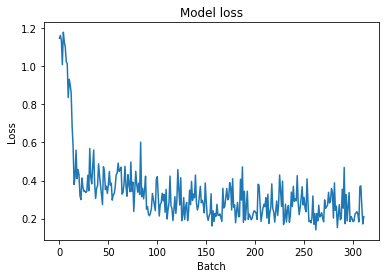

In [14]:
plt.plot(loss_history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Batch')
plt.show()

In [15]:
device = 'cpu'

net.eval()
if device == 'cuda':
    pass
else:
    net.to(device)

test_losses = []
# Show images
for idx in range(len(test_set_cover)):
    test_secret = test_set_secret[idx].float().unsqueeze(1)
    test_cover = test_set_cover[idx].float().unsqueeze(1)

    # Creates variable from secret and cover images
    test_secret = Variable(test_secret, volatile=True).to(device)
    test_cover = Variable(test_cover, volatile=True).to(device)

    # Compute output
    test_hidden, test_output = net(test_secret, test_cover, device)
    
    # Calculate loss
    test_loss, loss_cover, loss_secret = customized_loss(test_output, test_hidden, test_secret, test_cover, beta)

    if device == 'cuda':
        pass
    else:
        test_loss.to('cpu')
        loss_cover.to('cpu')
        loss_secret.to('cpu')
    print ('Validation: photo {}/{} loss: {:.10f} \nLoss on secret: {:.10f} \nLoss on cover: {:.10f}'.format(idx+1, int(len(test_set_cover)), test_loss.data, loss_secret.data, loss_cover.data))
        
    test_losses.append(test_loss.data)
        
mean_test_loss = np.mean(test_losses)

print ('Average Validation loss on validation set: {:.10f}'.format(mean_test_loss))

<ipython-input-15-f1e584a7a283>:16: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_secret = Variable(test_secret, volatile=True).to(device)
<ipython-input-15-f1e584a7a283>:17: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_cover = Variable(test_cover, volatile=True).to(device)
<ipython-input-8-40fe894c6fe5>:116: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  noise = torch.nn.init.normal(torch.Tensor(out.data.size()), 0, 0.1).to(device)
<ipython-input-10-95a7298b6f53>:4: UserWarning: Using a target size (torch.Size([3, 1, 256, 256])) that is different to the input size (torch.Size([3, 3, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_cover = torch.sqrt(torch.nn.functional.mse_loss(C_prime, C))
<ipython-input-10-95a7298b6f53>:5: UserWarning: Using a target size (torch.Size([3, 

Validation: photo 1/26 loss: 0.2233453393 
Loss on secret: 0.1737899482 
Loss on cover: 0.0495553985
Validation: photo 2/26 loss: 0.4313995838 
Loss on secret: 0.3112471104 
Loss on cover: 0.1201524809
Validation: photo 3/26 loss: 0.2980785072 
Loss on secret: 0.2582776546 
Loss on cover: 0.0398008488
Validation: photo 4/26 loss: 0.4384064972 
Loss on secret: 0.3591043949 
Loss on cover: 0.0793021098
Validation: photo 5/26 loss: 0.1590977311 
Loss on secret: 0.1223157421 
Loss on cover: 0.0367819928
Validation: photo 6/26 loss: 0.2453647256 
Loss on secret: 0.2121194452 
Loss on cover: 0.0332452729
Validation: photo 7/26 loss: 0.1837298423 
Loss on secret: 0.1554396749 
Loss on cover: 0.0282901675
Validation: photo 8/26 loss: 0.1827267706 
Loss on secret: 0.1403833032 
Loss on cover: 0.0423434600
Validation: photo 9/26 loss: 0.1614921540 
Loss on secret: 0.1115966812 
Loss on cover: 0.0498954691
Validation: photo 10/26 loss: 0.2308148891 
Loss on secret: 0.1982727945 
Loss on cover: 0.

## Optional Task

What if you have two secret images to encrpt, what if there are more. Does LSB work? Does the NN work? 

In [7]:
def separate_cover_secret(train_set, test_set):
  one_third_train = int(len(train_set) / 3)
  train_set_cover = train_set[:one_third_train]
  train_set_secret = train_set[one_third_train : 2 * one_third_train]
  train_set_secret_2 = train_set[2 * one_third_train:]

  one_third_test = int(len(test_set) / 3)
  test_set_cover = test_set[:one_third_test]
  test_set_secret = test_set[one_third_test : 2 * one_third_test]
  test_set_secret_2 = test_set[2 * one_third_test:]
  return train_set_cover, train_set_secret, train_set_secret_2, test_set_cover, test_set_secret, test_set_secret_2

In [8]:
train_set_cover, train_set_secret, train_set_secret_2, test_set_cover, test_set_secret, test_set_secret_2 = separate_cover_secret(train_set, test_set)

In [9]:
def customized_loss(S_prime, S_2_prime, C_prime, S, S_2, C, B):
    ''' Calculates loss specified on the paper.'''
    
    loss_cover = torch.nn.functional.mse_loss(C_prime, C)
    loss_secret = torch.nn.functional.mse_loss(S_prime, S)
    loss_secret_2 = torch.nn.functional.mse_loss(S_2_prime, S_2)

    loss_all = loss_cover + B * loss_secret + B * loss_secret_2
    return loss_all, loss_cover, loss_secret, loss_secret_2

def denormalize(image, std, mean):
    ''' Denormalizes a tensor of images.'''

    for t in range(3):
        image[t, :, :] = (image[t, :, :] * std[t]) + mean[t]
    return image

def imshow(img, idx, learning_rate, beta):
    '''Prints out an image given in tensor format.'''
    
    img = denormalize(img, std, mean)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title('Example '+str(idx)+', lr='+str(learning_rate)+', B='+str(beta))
    plt.show()
    return

def gaussian(tensor, mean=0, stddev=0.1):
    '''Adds random noise to a tensor.'''
    
    noise = torch.nn.init.normal(torch.Tensor(tensor.size()), 0, 0.1).to('cuda')
    return Variable(tensor + noise).to('cuda')

In [10]:
class PrepNetwork(nn.Module):
    def __init__(self):
        super(PrepNetwork, self).__init__()
        self.initialP3 = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,50,kernel_size = 3, padding=1)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(50,50,kernel_size = 3, padding=1)),
          ('relu2', nn.ReLU()),
        ]))
        self.initialP4 = nn.Sequential(OrderedDict([
          ('conv3', nn.Conv2d(1,50,kernel_size = 4, padding=1)),
          ('relu3', nn.ReLU()),
          ('conv4', nn.Conv2d(50,50,kernel_size = 4, padding=2)),
          ('relu4', nn.ReLU()),
        ]))
        self.initialP5 = nn.Sequential(OrderedDict([
          ('conv5', nn.Conv2d(1,50,kernel_size = 5, padding=2)),
          ('relu5', nn.ReLU()),
          ('conv6', nn.Conv2d(50,50,kernel_size = 5, padding=2)),
          ('relu6', nn.ReLU()),
        ]))
        self.finalP3 = nn.Sequential(OrderedDict([
          ('conv7', nn.Conv2d(150,50,kernel_size = 3, padding=1)),
          ('relu7', nn.ReLU())
        ]))
        self.finalP4 = nn.Sequential(OrderedDict([
          ('conv8', nn.Conv2d(150,50,kernel_size = 4, padding=1)),
          ('relu8', nn.ReLU()),
          ('conv9', nn.Conv2d(50, 50, kernel_size=4, padding=2)),
          ('relu9', nn.ReLU())
        ]))
        self.finalP5 = nn.Sequential(OrderedDict([
          ('conv10', nn.Conv2d(150,50, kernel_size = 5, padding=2)),
          ('relu10', nn.ReLU())
        ]))
        

    def forward(self, p):
        p1 = self.initialP3(p)
        p2 = self.initialP4(p)
        p3 = self.initialP5(p)
        mid = torch.cat((p1, p2, p3), 1)
        p4 = self.finalP3(mid)
        p5 = self.finalP4(mid)
        p6 = self.finalP5(mid)
        out = torch.cat((p4, p5, p6), 1)
        return out

class PrepNetwork2(nn.Module):
    def __init__(self):
        super(PrepNetwork2, self).__init__()
        self.initialP3 = nn.Sequential(OrderedDict([
          ('conv11', nn.Conv2d(1,50,kernel_size = 3, padding=1)),
          ('relu11', nn.ReLU()),
          ('conv12', nn.Conv2d(50,50,kernel_size = 3, padding=1)),
          ('relu12', nn.ReLU()),
        ]))
        self.initialP4 = nn.Sequential(OrderedDict([
          ('conv13', nn.Conv2d(1,50,kernel_size = 4, padding=1)),
          ('relu13', nn.ReLU()),
          ('conv14', nn.Conv2d(50,50,kernel_size = 4, padding=2)),
          ('relu14', nn.ReLU()),
        ]))
        self.initialP5 = nn.Sequential(OrderedDict([
          ('conv15', nn.Conv2d(1,50,kernel_size = 5, padding=2)),
          ('relu15', nn.ReLU()),
          ('conv16', nn.Conv2d(50,50,kernel_size = 5, padding=2)),
          ('relu16', nn.ReLU()),
        ]))
        self.finalP3 = nn.Sequential(OrderedDict([
          ('conv17', nn.Conv2d(150,50,kernel_size = 3, padding=1)),
          ('relu17', nn.ReLU())
        ]))
        self.finalP4 = nn.Sequential(OrderedDict([
          ('conv18', nn.Conv2d(150,50,kernel_size = 4, padding=1)),
          ('relu18', nn.ReLU()),
          ('conv19', nn.Conv2d(50, 50, kernel_size=4, padding=2)),
          ('relu19', nn.ReLU())
        ]))
        self.finalP5 = nn.Sequential(OrderedDict([
          ('conv20', nn.Conv2d(150,50, kernel_size = 5, padding=2)),
          ('relu20', nn.ReLU())
        ]))
        

    def forward(self, p_2):
        p1_2 = self.initialP3(p_2)
        p2_2 = self.initialP4(p_2)
        p3_2 = self.initialP5(p_2)
        mid_2 = torch.cat((p1_2, p2_2, p3_2), 1)
        p4_2 = self.finalP3(mid_2)
        p5_2 = self.finalP4(mid_2)
        p6_2 = self.finalP5(mid_2)
        out_2 = torch.cat((p4_2, p5_2, p6_2), 1)
        return out_2

# Hiding Network (5 conv layers)
class HidingNetwork(nn.Module):
    def __init__(self):
        super(HidingNetwork, self).__init__()
        self.initialH3 = nn.Sequential(
            nn.Conv2d(151, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.initialH4 = nn.Sequential(
            nn.Conv2d(151, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.initialH5 = nn.Sequential(
            nn.Conv2d(151, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalH3 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.finalH4 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.finalH5 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalH = nn.Sequential(
            nn.Conv2d(150, 1, kernel_size=1, padding=0))
        
    def forward(self, h):
        h1 = self.initialH3(h)
        h2 = self.initialH4(h)
        h3 = self.initialH5(h)
        mid = torch.cat((h1, h2, h3), 1)
        h4 = self.finalH3(mid)
        h5 = self.finalH4(mid)
        h6 = self.finalH5(mid)
        mid2 = torch.cat((h4, h5, h6), 1)
        out = self.finalH(mid2)
        out_noise = gaussian(out.data, 0, 0.1)
        return out, out_noise

# Hiding Network 2 to hide second image
class HidingNetwork2(nn.Module):
    def __init__(self):
        super(HidingNetwork2, self).__init__()
        self.initialH3 = nn.Sequential(
            nn.Conv2d(151, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.initialH4 = nn.Sequential(
            nn.Conv2d(151, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.initialH5 = nn.Sequential(
            nn.Conv2d(151, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalH3 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.finalH4 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())

        self.finalH5 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalH = nn.Sequential(
            nn.Conv2d(150, 3, kernel_size=1, padding=0))
        
    def forward(self, h_2):
        h1_2 = self.initialH3(h_2)
        h2_2 = self.initialH4(h_2)
        h3_2 = self.initialH5(h_2)
        mid_2 = torch.cat((h1_2, h2_2, h3_2), 1)
        h4_2 = self.finalH3(mid_2)
        h5_2 = self.finalH4(mid_2)
        h6_2 = self.finalH5(mid_2)
        mid2_2 = torch.cat((h4_2, h5_2, h6_2), 1)
        out_2 = self.finalH(mid2_2)
        out_noise_2 = gaussian(out_2.data, 0, 0.1)
        return out_2, out_noise_2

# Reveal Network (2 conv layers)
class RevealNetwork(nn.Module):
    def __init__(self):
        super(RevealNetwork, self).__init__()
        self.initialR3 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.initialR4 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.initialR5 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalR3 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.finalR4 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.finalR5 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalR = nn.Sequential(
            nn.Conv2d(150, 1, kernel_size=1, padding=0))

    def forward(self, r):
        r1 = self.initialR3(r)
        r2 = self.initialR4(r)
        r3 = self.initialR5(r)
        mid = torch.cat((r1, r2, r3), 1)
        r4 = self.finalR3(mid)
        r5 = self.finalR4(mid)
        r6 = self.finalR5(mid)
        mid2 = torch.cat((r4, r5, r6), 1)
        out = self.finalR(mid2)
        return out

# Reveal Network (2 conv layers)
class RevealNetwork2(nn.Module):
    def __init__(self):
        super(RevealNetwork2, self).__init__()
        self.initialR3 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.initialR4 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.initialR5 = nn.Sequential(
            nn.Conv2d(3, 50, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalR3 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=3, padding=1),
            nn.ReLU())
        self.finalR4 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.Conv2d(50, 50, kernel_size=4, padding=2),
            nn.ReLU())
        self.finalR5 = nn.Sequential(
            nn.Conv2d(150, 50, kernel_size=5, padding=2),
            nn.ReLU())
        self.finalR = nn.Sequential(
            nn.Conv2d(150, 1, kernel_size=1, padding=0))

    def forward(self, r_2):
        r1_2 = self.initialR3(r_2)
        r2_2 = self.initialR4(r_2)
        r3_2 = self.initialR5(r_2)
        mid_2 = torch.cat((r1_2, r2_2, r3_2), 1)
        r4_2 = self.finalR3(mid_2)
        r5_2 = self.finalR4(mid_2)
        r6_2 = self.finalR5(mid_2)
        mid2_2 = torch.cat((r4_2, r5_2, r6_2), 1)
        out_2 = self.finalR(mid2_2)
        return out_2

# Join six networks in one module
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.m1 = PrepNetwork()
        self.m2 = PrepNetwork2()
        self.m3 = HidingNetwork()
        self.m4 = HidingNetwork2()
        self.m5 = RevealNetwork()
        self.m6 = RevealNetwork2()

    def forward(self, secret, secret_2, cover):
        x_1 = self.m1(secret)
        x_2 = self.m2(secret_2)
        mid = torch.cat((x_1, cover), 1)
        x_3, x_3_noise = self.m3(mid)
        mid2 = torch.cat((x_2, x_3), 1)
        x_4, x_4_noise = self.m4(mid2)
        x_5 = self.m5(x_4)
        x_6 = self.m6(x_4)
        return x_4,x_5,x_6
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))


In [11]:
net = Net()

In [21]:
def train_model_optional(train_set, train_secrets, train_secrets_2, train_covers, beta, learning_rate, num_epochs):
    # Save optimizer
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    loss_history = []
    # Iterate over batches performing forward and backward passes
    for epoch in range(num_epochs):

        # Train mode
        net.train()
        net.to('cuda')
        #net.to('cuda')
        train_losses = []
        # Train one epoch
        #for idx, res_lst in enumerate(train_set):
        for idx in range(len(train_set_cover)):
            train_covers = train_set_cover[idx].float().unsqueeze(1)
            train_secrets = train_set_secret[idx].float().unsqueeze(1)
            train_secrets_2 = train_set_secret_2[idx].float().unsqueeze(1)
            #train_covers.to('cuda')
            #train_secrets.to('cuda')

            # Creates variable from secret and cover images
            train_secrets = Variable(train_secrets, requires_grad=False).to('cuda')
            train_secrets_2 = Variable(train_secrets_2, requires_grad=False).to('cuda')
            train_covers = Variable(train_covers, requires_grad=False).to('cuda')
            

            # Forward + Backward + Optimize
            optimizer.zero_grad()
            train_hidden, train_output, train_output_2 = net(train_secrets, train_secrets_2, train_covers)

            # Calculate loss and perform backprop
            train_loss, train_loss_cover, train_loss_secret, train_loss_secret_2 = customized_loss(train_output, train_output_2, train_hidden, train_secrets, train_secrets_2, train_covers, beta)
            train_loss.backward()
            optimizer.step()
            
            # Saves training loss
            train_loss.data.to('cpu')
            train_loss_cover.data.to('cpu')
            train_loss_secret.data.to('cpu')
            train_loss_secret_2.data.to('cpu')
            train_losses.append(train_loss.data.to('cpu'))
            loss_history.append(train_loss.data.to('cpu'))
            
            # Prints mini-batch losses
            print('Training: Batch {0}/{1}. Loss of {2:.4f}, cover loss of {3:.4f}, secret1 loss of {4:.4f}, secret2 loss of {5:4f}'.format(idx+1, int(len(train_set)/2), train_loss.data, train_loss_cover.data, train_loss_secret.data, train_loss_secret_2.data))
    
        torch.save(net.state_dict(), 'Epoch N{}.pkl'.format(epoch+1))
        
        mean_train_loss = np.mean(train_losses)
    
        # Prints epoch average loss
        print ('Epoch [{0}/{1}], Average_loss: {2:.4f}'.format(
                epoch+1, num_epochs, mean_train_loss))
    
    return net, mean_train_loss, loss_history

In [22]:
net, mean_train_loss, loss_history = train_model_optional(train_set, train_set_secret, train_set_secret_2, train_set_cover, beta, learning_rate, num_epochs)

<ipython-input-9-8bc6b9825158>:31: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  noise = torch.nn.init.normal(torch.Tensor(tensor.size()), 0, 0.1).to('cuda')
<ipython-input-9-8bc6b9825158>:4: UserWarning: Using a target size (torch.Size([3, 1, 256, 256])) that is different to the input size (torch.Size([3, 3, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_cover = torch.nn.functional.mse_loss(C_prime, C)


Training: Batch 1/104. Loss of 0.1574, cover loss of 0.0241, secret1 loss of 0.0788, secret2 loss of 0.054409
Training: Batch 2/104. Loss of 0.1856, cover loss of 0.0593, secret1 loss of 0.1192, secret2 loss of 0.007025
Training: Batch 3/104. Loss of 0.0823, cover loss of 0.0329, secret1 loss of 0.0150, secret2 loss of 0.034405
Training: Batch 4/104. Loss of 0.1196, cover loss of 0.0497, secret1 loss of 0.0215, secret2 loss of 0.048368
Training: Batch 5/104. Loss of 0.1624, cover loss of 0.0461, secret1 loss of 0.0883, secret2 loss of 0.028049
Training: Batch 6/104. Loss of 0.1123, cover loss of 0.0545, secret1 loss of 0.0458, secret2 loss of 0.012062
Training: Batch 7/104. Loss of 0.2108, cover loss of 0.1184, secret1 loss of 0.0545, secret2 loss of 0.037911
Training: Batch 8/104. Loss of 0.1082, cover loss of 0.0296, secret1 loss of 0.0394, secret2 loss of 0.039191
Training: Batch 9/104. Loss of 0.0803, cover loss of 0.0279, secret1 loss of 0.0247, secret2 loss of 0.027786
Training: 

Training: Batch 6/104. Loss of 0.0782, cover loss of 0.0593, secret1 loss of 0.0145, secret2 loss of 0.004470
Training: Batch 7/104. Loss of 0.1030, cover loss of 0.0727, secret1 loss of 0.0192, secret2 loss of 0.011081
Training: Batch 8/104. Loss of 0.0319, cover loss of 0.0169, secret1 loss of 0.0118, secret2 loss of 0.003173
Training: Batch 9/104. Loss of 0.0338, cover loss of 0.0199, secret1 loss of 0.0080, secret2 loss of 0.005985
Training: Batch 10/104. Loss of 0.0511, cover loss of 0.0318, secret1 loss of 0.0085, secret2 loss of 0.010767
Training: Batch 11/104. Loss of 0.0262, cover loss of 0.0160, secret1 loss of 0.0068, secret2 loss of 0.003447
Training: Batch 12/104. Loss of 0.0467, cover loss of 0.0339, secret1 loss of 0.0086, secret2 loss of 0.004179
Training: Batch 13/104. Loss of 0.0390, cover loss of 0.0186, secret1 loss of 0.0120, secret2 loss of 0.008414
Training: Batch 14/104. Loss of 0.0537, cover loss of 0.0259, secret1 loss of 0.0248, secret2 loss of 0.002964
Train

Training: Batch 11/104. Loss of 0.0235, cover loss of 0.0131, secret1 loss of 0.0067, secret2 loss of 0.003747
Training: Batch 12/104. Loss of 0.0421, cover loss of 0.0271, secret1 loss of 0.0117, secret2 loss of 0.003340
Training: Batch 13/104. Loss of 0.0393, cover loss of 0.0175, secret1 loss of 0.0115, secret2 loss of 0.010297
Training: Batch 14/104. Loss of 0.0551, cover loss of 0.0261, secret1 loss of 0.0265, secret2 loss of 0.002527
Training: Batch 15/104. Loss of 0.0582, cover loss of 0.0254, secret1 loss of 0.0281, secret2 loss of 0.004741
Training: Batch 16/104. Loss of 0.0718, cover loss of 0.0414, secret1 loss of 0.0259, secret2 loss of 0.004529
Training: Batch 17/104. Loss of 0.0251, cover loss of 0.0116, secret1 loss of 0.0089, secret2 loss of 0.004623
Training: Batch 18/104. Loss of 0.0198, cover loss of 0.0099, secret1 loss of 0.0070, secret2 loss of 0.002897
Training: Batch 19/104. Loss of 0.0288, cover loss of 0.0137, secret1 loss of 0.0109, secret2 loss of 0.004161
T

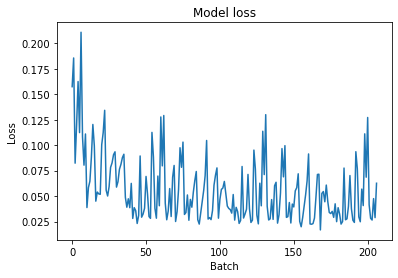

In [23]:
plt.plot(loss_history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Batch')
plt.show()

## Data set 

https://www.kaggle.com/gaz3ll3/optimization-ii-project-3

In order to efficiency, we only consider small pictures, 256x256. If you have problem dealing with 256x256, you can resize them to 128x128 or 64x64.  If you feel the images are too many, you can sample a portion from them as well.  

Training and Validation sets are chosen at random (say, 80% and 20%). Each input data will be two images from the training set. 

If you are more comfortable with other data sets, it is up to you. Say you can use https://tiny-imagenet.herokuapp.com/ for 64x64 small images.

## Metric

In your trainging process for $D$ and $E$, the norm to compare images is the RMSE (root mean squared error), the images are of dimension $N\times N\times 3$, BTW.

## Your final result


1.   A writeup on your work, including performance, your work, issues, how do you solve the issues, etc. 
2.   Test your codes (LSB and NN) against the data set http://r0k.us/graphics/kodak/, each image will be downsize to 256x256 or 128x128 or 64x64 if you trained an NN on smaller images. Report your result in your writeup. 
3. Code, again, host on github. Submission will be a link. 
4. If you also tried the optional task, please also report that in your writeup.




In [25]:
def load_test_images():
    data_lst = []
    name_lst = []
    
    file_dirlist = os.listdir('TestDataSet')
    for file_dir in file_dirlist:
        split = os.path.splitext(file_dir)
        if split[1] == '.png':
            file_full_path = os.path.join('TestDataSet', file_dir)
            image_tensor = torchvision.io.read_image(file_full_path)
            data_lst.append(image_tensor.div(256))
            name_lst.append(file_dir)
    return data_lst, name_lst

In [26]:
test_data_set, test_data_name = load_test_images()

In [27]:
test_data_set[0]

tensor([[[0.3867, 0.3867, 0.3867,  ..., 0.3867, 0.3867, 0.3867],
         [0.3867, 0.3867, 0.3867,  ..., 0.3867, 0.3867, 0.3867],
         [0.3867, 0.3867, 0.3867,  ..., 0.3711, 0.3867, 0.3867],
         ...,
         [0.3867, 0.3867, 0.3867,  ..., 0.2969, 0.3906, 0.3867],
         [0.3867, 0.3867, 0.3867,  ..., 0.3945, 0.3867, 0.3867],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.3867, 0.3867, 0.3867,  ..., 0.3867, 0.3867, 0.3867],
         [0.3867, 0.3867, 0.3867,  ..., 0.3867, 0.3867, 0.3867],
         [0.3867, 0.3867, 0.3867,  ..., 0.3711, 0.3867, 0.3867],
         ...,
         [0.3867, 0.3867, 0.3867,  ..., 0.2969, 0.3906, 0.3867],
         [0.3867, 0.3867, 0.3867,  ..., 0.3945, 0.3867, 0.3867],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.3867, 0.3867, 0.3867,  ..., 0.3867, 0.3867, 0.3867],
         [0.3867, 0.3867, 0.3867,  ..., 0.3867, 0.3867, 0.3867],
         [0.3867, 0.3867, 0.3867,  ..., 0.3711, 0.3867, 0.

In [28]:
print('test_set')
net.eval()
net.to('cpu')
test_losses = []
i = 0
while i < len(test_data_set):
    test_secret = test_data_set[i+1].float().unsqueeze(1)
    test_cover = test_data_set[i].float().unsqueeze(1)
    test_cover_name = test_data_name[i]
    test_secret_name = test_data_name[i+1]

    # Creates variable from secret and cover images
    test_secret = Variable(test_secret, volatile=True)
    test_cover = Variable(test_cover, volatile=True)
    
    # Compute output
    test_hidden, test_output = net(test_secret, test_cover, 'cpu')
    
    # Calculate loss
    test_loss, loss_cover, loss_secret = customized_loss(test_output, test_hidden, test_secret, test_cover, beta)

    print('Test photo cover:', test_cover_name)
    print('Test photo secrete:', test_secret_name)
    print ('loss: {:.10f} \nLoss on secret: {:.10f} \nLoss on cover: {:.10f}\n'.format(test_loss.data, loss_secret.data, loss_cover.data))
        
    test_losses.append(test_loss.data)
    i += 2
        
mean_test_loss = np.mean(test_losses)

print ('\nAverage Test loss on test set: {:.10f}'.format(mean_test_loss))

test_set


<ipython-input-28-99ae47cfea6a>:13: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_secret = Variable(test_secret, volatile=True)
<ipython-input-28-99ae47cfea6a>:14: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_cover = Variable(test_cover, volatile=True)


TypeError: expected Tensor as element 1 in argument 0, but got str